### LSTM (Long Short-Term Memory Networks)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [2]:
sales = pd.read_csv('dataset/sales_dataset.csv', parse_dates=True, index_col=0)

In [3]:
target = np.array(sales.Sales)

In [4]:
train_target = target[:-9].reshape(-1,1)
test_target = target[-9:].reshape(-1,1)

In [5]:
scaler = StandardScaler()
scaler.fit(train_target)
scaledTrainData = scaler.transform(train_target)
scaledTestData = scaler.transform(test_target)

In [6]:
def create_dataset(X, y, time_steps):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs).reshape(-1,time_steps,1), np.array(ys)

In [7]:
time_steps=10
X_train, y_train = create_dataset(scaledTrainData, scaledTrainData, time_steps)

In [8]:
X_train.shape, y_train.shape

((86, 10, 1), (86, 1))

In [9]:
model = keras.Sequential()
model.add(keras.layers.LSTM(
  units=70,
  return_sequences=True,  
  input_shape=(X_train.shape[1], X_train.shape[2])
))
model.add(keras.layers.LSTM(units=70, return_sequences=True))
model.add(keras.layers.LSTM(units=70, return_sequences=True))
model.add(keras.layers.LSTM(units=70))
model.add(keras.layers.Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)

In [10]:
history = model.fit(
    X_train, y_train,
    epochs=250,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Train on 77 samples, validate on 9 samples
Epoch 1/250
77/77 [==============================] - 4s 53ms/sample - loss: 0.9892 - val_loss: 1.6917
Epoch 2/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.9640 - val_loss: 1.6592
Epoch 3/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.9386 - val_loss: 1.6108
Epoch 4/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.9021 - val_loss: 1.5958
Epoch 5/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.9007 - val_loss: 1.6280
Epoch 6/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.9079 - val_loss: 1.5932
Epoch 7/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.9002 - val_loss: 1.5785
Epoch 8/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.8914 - val_loss: 1.5831
Epoch 9/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.8841 - val_loss: 1.6016
Epoch 10/250
77/77 [===========================

Epoch 81/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.1808 - val_loss: 0.3734
Epoch 82/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.1691 - val_loss: 0.4152
Epoch 83/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.1715 - val_loss: 0.3899
Epoch 84/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.1584 - val_loss: 0.4368
Epoch 85/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.1550 - val_loss: 0.4008
Epoch 86/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.1528 - val_loss: 0.3947
Epoch 87/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.1575 - val_loss: 0.3788
Epoch 88/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.1449 - val_loss: 0.4381
Epoch 89/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.1460 - val_loss: 0.3759
Epoch 90/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.1444

77/77 [==============================] - 0s 1ms/sample - loss: 0.0154 - val_loss: 0.2961
Epoch 240/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0151 - val_loss: 0.3120
Epoch 241/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0161 - val_loss: 0.2460
Epoch 242/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0135 - val_loss: 0.3243
Epoch 243/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0141 - val_loss: 0.2921
Epoch 244/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0152 - val_loss: 0.2959
Epoch 245/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0182 - val_loss: 0.2505
Epoch 246/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0153 - val_loss: 0.3274
Epoch 247/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0144 - val_loss: 0.2811
Epoch 248/250
77/77 [==============================] - 0s 1ms/sample - loss: 0.0144 - v

In [11]:
ypred = []
for i in range(len(scaledTestData)):
    if i == 0:
        ypred.append(model.predict(scaledTrainData[-10:].reshape(1,time_steps,1)))        
    else:
        prev_predictions = [x[0][0] for x in ypred]
        ypred.append(model.predict(np.concatenate((scaledTrainData[-10+i:].reshape(-1),prev_predictions)) \
                                   .reshape(1,time_steps,1)))  

In [12]:
ypred

[array([[0.10308561]], dtype=float32),
 array([[-0.63077736]], dtype=float32),
 array([[-0.27113536]], dtype=float32),
 array([[-0.02164022]], dtype=float32),
 array([[0.07786097]], dtype=float32),
 array([[-0.04340876]], dtype=float32),
 array([[-0.31373158]], dtype=float32),
 array([[-1.081224]], dtype=float32),
 array([[-0.08101569]], dtype=float32)]

In [13]:
ypred = [x[0][0] for x in ypred]

In [14]:
ypred

[0.10308561,
 -0.63077736,
 -0.27113536,
 -0.021640217,
 0.077860974,
 -0.04340876,
 -0.31373158,
 -1.081224,
 -0.08101569]

In [15]:
predictions = np.round(scaler.inverse_transform(ypred))
predictions

array([5074., 3145., 4091., 4747., 5008., 4689., 3979., 1961., 4590.],
      dtype=float32)

In [16]:
np.sqrt(mean_squared_error(test_target,predictions))

627.0900165756818

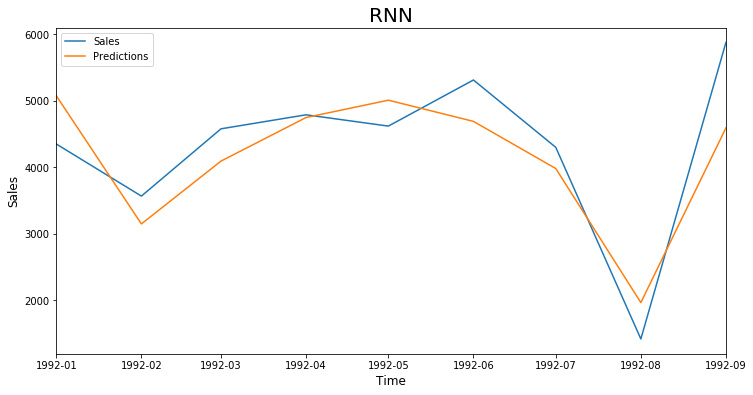

In [17]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(sales.index[-9:], sales.Sales[-9:], label='Sales');
ax.plot(sales.index[-9:], predictions, label='Predictions');

ax.set_xlim(sales.index[-9], sales.index[-1])

ax.set_ylabel('Sales', fontsize=12)
ax.set_xlabel('Time', fontsize=12)
ax.set_title('RNN', fontsize=20)
plt.legend(loc='upper left')
plt.show()

### Conclusion and Results

The predictions are done by taking 10 time steps. For the prediciton of sales at 1992-01, the last 10 time steps from the training set are taken. For the prediction of sales at 1992-02, the last 9 time steps from the training set and the last prediction (prediction at 1992-01) are taken. For the prediction of sales at 1992-03, the last 8 time steps from the training set and the last 2 predicitions (predictions at 1992-01 and 1992-02) are taken. This continues untill all the predictions for sales are made for the last months.    

The neural network topology designed using LSTM layers gives the highest RMSE for the last 9 months compared to exponential smoothing and SARIMA.  

This network can be fiddled with to try to decrease RMSE. Some of the options can be adding more layers, increasing the # of neurons in each layer, adding dropout layers, adding regularization, changing the learning rate and so on. The possible path for following can be decided after figuring out if overfitting or underfitting is the problem. When validation loss is compared with training loss, it seems that overfitting is the problem.

Since the RNN results are not as good as exponential smoothing results in terms of RMSE measured on the last 9 months, the results are not saved to a csv file. There is not too much training data for deep learning as well.  